In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
from data_loader import inputs_poking, inputs_sawyer_data
from scipy.misc import imresize
from models import build_resnet18_network, build_resnet50_network, rebuild_original_network
pos_max = 16.0
neg_min = 32.0
neg_max = 90.0
def plot_msk(img, msk, score, axis):
    assert(np.max(img) < 0.51)
    assert(np.min(img) > -0.51)
    if np.sum(msk) != 0:
        msk_unique = np.unique(msk)
        assert(msk_unique[0] in [0,1])
        assert(msk_unique[1] in [0,1])
    image = ((img + 0.5)*255).astype(np.uint8)
    msk = imresize(msk, (192, 192))
    image[(msk>0).astype(np.bool),0]=255
    axis.imshow(image)
    axis.set_title(score)
    return 

train_sgd_resnet18_lambda_8.00_a_23_b_46_decay_0.00050_lr_factor1.00_msk_ration8-73000: score not that binary, msk okay. model1

train_sgd_resnet18_lambda_24.00_a_23_b_46_decay_0.00500_lr_factor1.00_msk_ration24-63000: large weight decay makes score even less binary, msk seems fine. #####but score is still linear separtable/// model2

train_sgd_resnet18_lambda_24.00_a_23_b_46_decay_0.00100_lr_factor1.00_msk_ration24-66000: 

INFO:tensorflow:Restoring parameters from ./models/train_sgd_resnet18_lambda_24.00_a_16_b_32_decay_0.00050_lr_factor1.00_background_False-199000
finish building original graph
(128,)


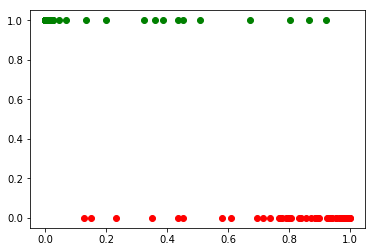

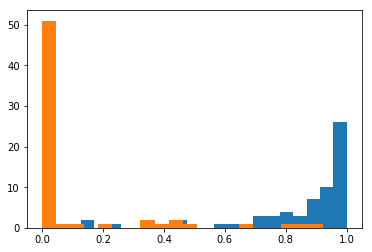

/home/dian/.anaconda3/envs/railrl-dian/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/home/dian/.anaconda3/envs/railrl-dian/lib/python3.5/site-packages/ipykernel_launcher.py:82: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/home/dian/.anaconda3/envs/railrl-dian/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
###########read sawyer and poking data###########
path_poking = '/media/icm_data/poke_nlc_training_new/'
train_set_names = list([path_poking + '/' + l for l in os.listdir(path_poking)])

path_sawyer = '/media/icm_data/sawyer_data_new'
train_set_new_names = list([path_sawyer + '/' + l for l in os.listdir(path_sawyer)])
train_set_new_pos_names = list(filter(lambda s: 'pos' in s, train_set_new_names))
train_set_new_neg_names = list(filter(lambda s: 'neg' in s, train_set_new_names))

addBk = True
train_pos_imgs_sawyer, train_pos_masks_sawyer, train_pos_scores_sawyer, pos_bks = \
                                inputs_sawyer_data(train_set_new_pos_names, "positive", pos_max,\
                                                                neg_min, neg_max,batch_size = 64, addBg = addBk)
train_neg_imgs_sawyer, train_neg_masks_sawyer, train_neg_scores_sawyer, neg_bks = \
                                inputs_sawyer_data(train_set_new_neg_names, "negative", pos_max, \
                                                                neg_min, neg_max, batch_size = 32, addBg = addBk)
train_neg_from_pos_imgs, train_neg_from_pos_masks, train_neg_from_pos_scores, neg_from_pos_bks= \
                                inputs_sawyer_data(train_set_new_pos_names,"negative_from_positive", \
                                                                pos_max, neg_min, neg_max , batch_size = 32, addBg = addBk)


train_imgs = tf.concat([train_pos_imgs_sawyer, \
                            train_neg_imgs_sawyer, \
                            train_neg_from_pos_imgs], 0)

train_masks = tf.concat([train_pos_masks_sawyer,\
                            train_neg_masks_sawyer,\
                            train_neg_from_pos_masks], 0)

train_scores = tf.concat([train_pos_scores_sawyer,\
                            train_neg_scores_sawyer,\
                            train_neg_from_pos_scores], 0)
train_bks = tf.concat([pos_bks,\
                            neg_bks,\
                            neg_from_pos_bks], 0)
##########build_model########

# model_path = "./models/pretrain_sgd_resnet18_lambda_32.00_a_9_b_16_decay_0.00050-99000"
# model_path = "./models/train_sgd_resnet18_lambda_16.00_a_23_b_46_decay_0.00050_lr_factor0.10_msk_ratio16-23000"
# model_path = "./models/train_sgd_resnet18_lambda_32.00_a_23_b_46_decay_0.00050_lr_factor1.00-199000" #scoring better, msk slightly worse
# model_path = "./models/train_sgd_resnet18_lambda_32.00_a_23_b_46_decay_0.00050_lr_factor0.10-125000" #really bad score
# model_path = "./models/11_3_morning/train_sgd_resnet18_lambda_24.00_a_23_b_46_decay_0.00500_lr_factor1.00_msk_ration24-193000"
# model_path = "./models/pretrain_sgd_resnet18_lambda_24.00_a_16_b_32_background_False_decay_0.00050-99000"
model_path = "./models/train_sgd_resnet18_lambda_24.00_a_16_b_32_decay_0.00050_lr_factor1.00_background_False-199000"
# model_path = "./models/train_sgd_resnet18_lambda_8.00_a_16_b_32_decay_0.00100_lr_factor1.00_background_True-190000"
# model_path = "./models/train_sgd_resnet18_lambda_1.00_a_16_b_48_decay_0.00100_lr_factor1.00_background_True-2000"
# model_path = "./models/train_sgd_resnet18_lambda_0.00_a_16_b_48_decay_0.00100_lr_factor1.00_background_True-1000"
model_type = "resnet18"
# addBg = True
addBg = False

img_ph = tf.placeholder(tf.float32, [None, 192, 192, 3])
bg_ph = None
# bg_ph = tf.placeholder(tf.float32, [None, 160, 160, 3])

model_out, sess = rebuild_original_network(img_ph, model_path, model_type, background_ph=bg_ph)

##########plot imgs#########
sess = tf.Session()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

train_imgs_out, train_masks_out, train_scores_out, train_bks_out = \
        sess.run([train_imgs, train_masks, train_scores, train_bks])

# for train_img, train_msk, train_score, train_bk in zip(train_imgs_out, train_masks_out, train_scores_out, train_bks_out):
#     f, (ax1, ax2) = plt.subplots(1,2)
#     plot_msk(train_img, train_msk, train_score, ax1)
#     train_bk = ((train_bk + 0.5) * 255).astype(np.uint8)
#     ax2.imshow(train_bk)
#     plt.plot()
    
    
    
##########run model#############
# model_msks, model_scores = model_out((train_imgs_out + 0.5)*255, background=(train_bks_out+0.5)*255, batch=True)
# model_msks, model_scores = model_out((train_imgs_out + 0.5)*255, background=(train_bks_out+0.5)*255, batch=True)
model_msks, model_scores = model_out((train_imgs_out + 0.5)*255, background=np.random.random((128,160,160,3))*255, batch=True)
model_scores = model_scores[:,-1]
model_msks = model_msks[:,:,:,1]

print (model_scores.shape)

#plot score, see if score is linearly separtable
plt.plot(model_scores[:64], np.zeros(64), 'ro')
plt.plot(model_scores[64:], np.zeros(64) + 1, 'go')
plt.show()
plt.hist(model_scores[:64], bins = 20)
plt.hist(model_scores[64:], bins = 20)
plt.show()

for pos_img, pos_mask, pos_scor, model_score, model_msk in zip(train_imgs_out, \
                                train_masks_out, train_scores_out, model_scores, model_msks):
    f, (ax1, ax2) = plt.subplots(1,2)
    plot_msk(pos_img, pos_mask, pos_scor, ax1)
    tmp = ((pos_img.copy()+0.5)*255).astype(np.uint8)
    model_msk = (model_msk > 0.6).astype(np.uint8)
    model_msk = (imresize(model_msk, (192,192))*255).astype(np.uint8)
    tmp[:,:,0] = model_msk
    ax2.set_title("model_out score {}".format(model_score))
    ax2.imshow(tmp)
    plt.plot()
coord.request_stop()
tf.reset_default_graph()
sess.close()

In [4]:
###read poking data###

# path = '/media/icm_data/poke_nlc_val_new'
addBg = True
path = '/media/icm_data/poke_nlc_training_new/'
file_names = list([path + '/' + l for l in os.listdir(path)])
# print(file_names)
pos_imgs, pos_masks, pos_scores, pos_bks = inputs_poking(file_names,pos_max,neg_min, neg_max,\
                                                        batch_size = 40,positive=True, addBg = addBg)
neg_imgs, neg_masks, neg_scores, neg_bks = inputs_poking(file_names, pos_max, neg_min, neg_max,\
                                                        batch_size = 40,positive=False, addBg = addBg)

##########plot imgs#########
coord = tf.train.Coordinator()
sess = tf.Session()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

pos_imgs_out, pos_masks_out, pos_scores_out, pos_bks_out, neg_imgs_out, neg_mask_out, neg_scores_out, neg_bks_out = \
        sess.run([pos_imgs, pos_masks, pos_scores, pos_bks, neg_imgs, neg_masks, neg_scores, neg_bks])
if not addBg:
    assert(pos_bks_out[0] == -1)
    assert(neg_bks_out[0] == -1)
for pos_img, pos_mask, pos_scor, neg_img, neg_mask, neg_scor, pos_bk, neg_bk in zip(pos_imgs_out, \
                                pos_masks_out, pos_scores_out, neg_imgs_out, neg_mask_out, neg_scores_out, pos_bks_out, neg_bks_out):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
    plot_msk(pos_img, pos_mask, pos_scor, ax1)
    pos_bk = ((pos_bk + 0.5)*255).astype(np.uint8)
    neg_bk = ((neg_bk + 0.5)*255).astype(np.uint8)
    ax2.imshow(pos_bk)
    ax4.imshow(neg_bk)
    plot_msk(neg_img, neg_mask, neg_scor, ax3)
    
    plt.plot()
coord.request_stop()
sess.close()

ValueError: Tensor("input_1/strided_slice_1:0", shape=(), dtype=int32) must be from the same graph as Tensor("Const:0", shape=(6,), dtype=float32).